In [4]:
import numpy as np
import matplotlib.pyplot as plt

from lds.generative_model import lds_generative
from lds.filtering import lds_filtering
from network.network import train_network

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
learning_rate = 0.125

In [6]:
x = np.concatenate([
    np.array([np.array([1., 1.]) for _ in range(20)]), 
    np.array([np.array([1., 0.]) for _ in range(20)])
], axis=0)

r = np.ones((40, )) # assume noise-free observation

In [23]:
network, w_history, B_history = train_network(x, r, learning_rate, dt=1.0)

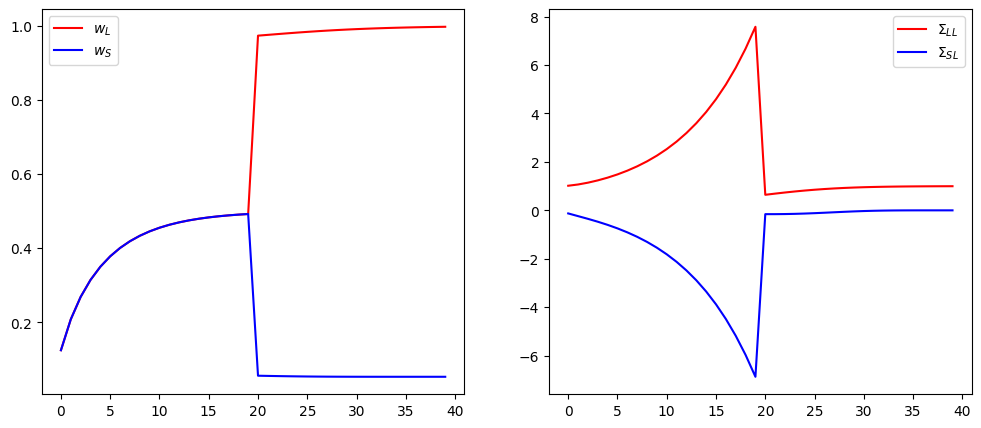

In [26]:
Sigma = np.linalg.inv(np.array([np.eye(x.shape[-1]) for _ in range(len(x))]) - B_history)

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

ax[0].plot(w_history[:, 0], "r-",  label=r"$w_{L}$")
ax[0].plot(w_history[:, 1], "b-", label=r"$w_{S}$")

ax[1].plot(Sigma[:, 0, 0], "r-", label=r"$\Sigma_{LL}$")
ax[1].plot(Sigma[:, 1, 0], "b-", label=r"$\Sigma_{SL}$")

ax[0].legend()
ax[1].legend()

In [27]:
# now what are the theoretical prediction given Kalman filtering?

transition_std = 0.09
obs_std = 0.35
init_std = 0.11

np.random.seed(10)

mu, Sigma = lds_filtering(r, x, init_std=init_std, obs_std=obs_std, transition_std=transition_std)

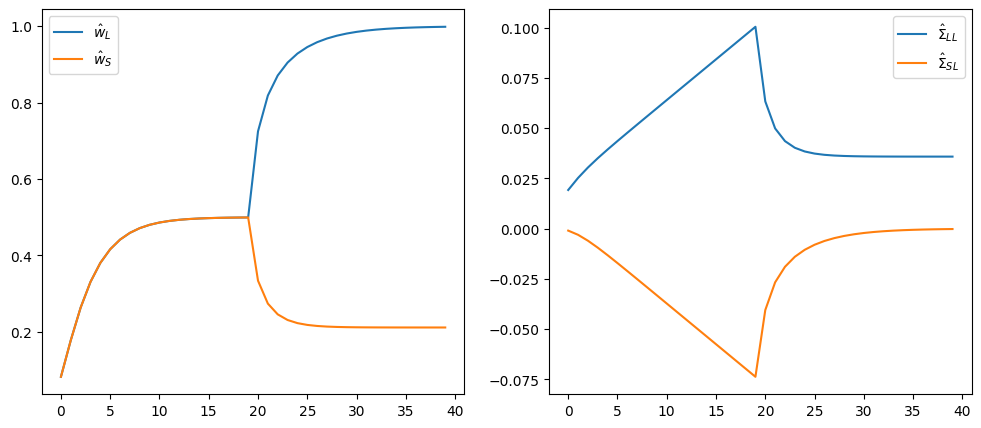

In [30]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].plot(mu[1:, 0], label=r"$\hat{w}_{L}$")
ax[0].plot(mu[1:, 1], label=r"$\hat{w}_{S}$")
ax[0].legend()

ax[1].plot(Sigma[1:, 0, 0], label=r"$\hat{\Sigma}_{LL}$")
ax[1].plot(Sigma[1:, 1, 0], label=r"$\hat{\Sigma}_{SL}$")
ax[1].legend()

In [45]:
# now what if there is multiplicative noise in the stimulus, but still assume zero noise in the observation

nv = 0.35

x = np.concatenate([
    np.array([np.array([1., 1.]) for _ in range(20)]), 
    np.array([np.array([1., 0.]) for _ in range(20)])
], axis=0)
x += np.random.randn(40, 2) * nv
x[20:, 1] = 0.0

r = np.ones((40, ))

In [46]:
network, w_history, B_history = train_network(x, r, learning_rate, dt=1.0)

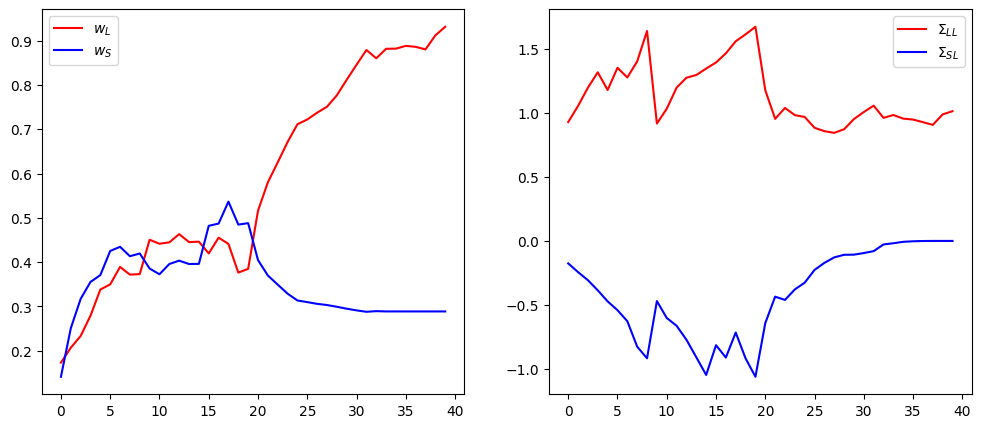

In [47]:
Sigma = np.linalg.inv(np.array([np.eye(x.shape[-1]) for _ in range(len(x))]) - B_history)

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

ax[0].plot(w_history[:, 0], "r-",  label=r"$w_{L}$")
ax[0].plot(w_history[:, 1], "b-", label=r"$w_{S}$")

ax[1].plot(Sigma[:, 0, 0], "r-", label=r"$\Sigma_{LL}$")
ax[1].plot(Sigma[:, 1, 0], "b-", label=r"$\Sigma_{SL}$")

ax[0].legend()
ax[1].legend()

In [48]:
# now comparing with theoretical predictions given Kalman filtering

mu, Sigma_Kalman = lds_filtering(r, x, init_std=init_std, obs_std=obs_std, transition_std=transition_std)

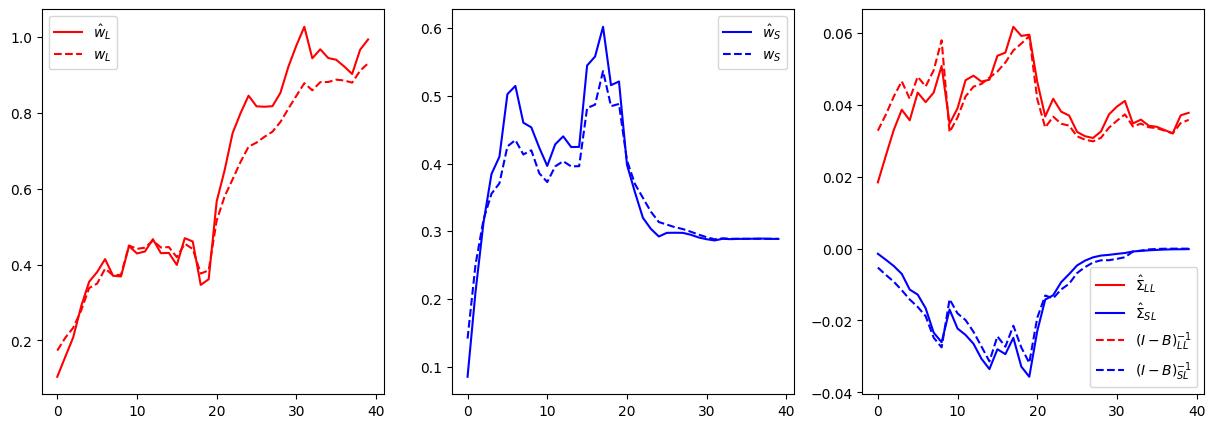

In [51]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].plot(mu[1:, 0], "r-", label=r"$\hat{w}_{L}$")
ax[0].plot(w_history[:, 0], "r--", label=r"$w_{L}$")
ax[0].legend()

ax[1].plot(mu[1:, 1], "b-", label=r"$\hat{w}_{S}$")
ax[1].plot(w_history[:, 1], "b--", label=r"$w_{S}$")
ax[1].legend()

ax[2].plot(Sigma_Kalman[1:, 0, 0], "r-", label=r"$\hat{\Sigma}_{LL}$")
ax[2].plot(Sigma_Kalman[1:, 1, 0], "b-", label=r"$\hat{\Sigma}_{SL}$")
ax[2].plot(Sigma[:, 0, 0] / Sigma[:, 0, 0].mean() * Sigma_Kalman[1:, 0, 0].mean(), "r--", label=r"$(I-B)^{-1}_{LL}$")
ax[2].plot(Sigma[:, 1, 0] / Sigma[:, 1, 0].mean() * Sigma_Kalman[1:, 1, 0].mean(), "b--", label=r"$(I-B)^{-1}_{SL}$") # rescaled
ax[2].legend()